## Basemap

![](images/latitude_longitude.png)
* The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on its own, but provides the facilities to transform coordinates to one of 25 different map projections.
* Basemap makes it easy to convert from the spherical coordinate system (latitudes & longitudes) to the Mercator projection.
* To plot the values on a two-dimensional plane, we need to convert the coordinates to the Cartesian coordinate system using a map projection.

In [41]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

* Create a new Basemap instance with specific map projection we want to use and how much of map we want to included.
    - `projection`: the map projection.
    - `llcrnrlat`: latitude of lower left hand corner of the desired map domain
    - `urcrnrlat`: latitude of upper right hand corner of the desired map domain
    - `llcrnrlon`: longitude of lower left hand corner of the desired map domain
    - `urcrnrlon`: longitude of upper right hand corner of the desired map domain
* Convert spherical coordinates to Cartesian coordinates using the basemap instance.
* Use the matplotlib and basemap methods to customize the map.
* Display the map.

In [42]:
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

* We can pass in a list of latitude and longitude values into the basemap instance and it will return back converted lists of longitude and latitude values using the projection we specified earlier.

```
x, y = m(longitudes, latitudes)
```
* It accept only list and returns 2 list objects
* Now we have correctly formatted long and lat in x and y, plot it as scatter plot

```
m.scatter(x, y, s=10) # s is size
m.drawcoastlines() # it will draw coastlines
```

* Basemap.drawgreatcircle() draw great circle between 2 points.
    - lon1 - longitude of the starting point.
    - lat1 - latitude of the starting point.
    - lon2 - longitude of the ending point.
    - lat2 - latitude of the ending point.
* It cannot handle situations in which the great circle intersects the edge of the map projection domain, and then re-enters the domain.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


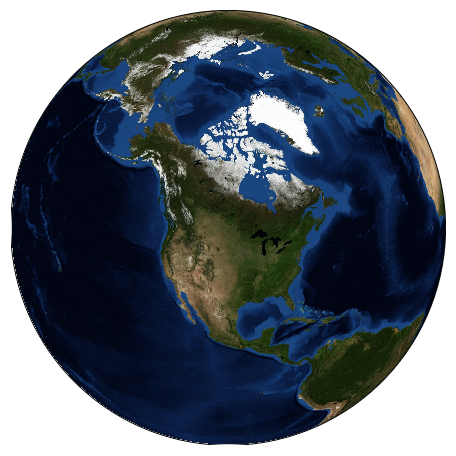

In [43]:
plt.figure(figsize=(8,8))
m = Basemap(projection='ortho', resolution=None, lat_0 = 50, lon_0=-100)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


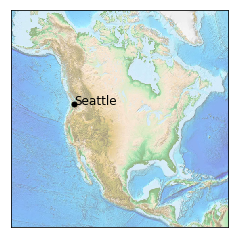

In [44]:
m = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6, lat_0=45, lon_0=-100)
m.etopo(scale=0.5, alpha=0.5)
x,y = m(-122.3,47.6)

plt.plot(x,y,'ok', markersize=5)
plt.text(x,y, 'Seattle', fontsize=12);

In [45]:
from itertools import chain

In [46]:
def draw_map(m, scale=0.2):
    m.shadedrelief(scale=scale)
    
    lats = m.drawparallels(np.linspace(-90,90,13))
    lons = m.drawmeridians(np.linspace(-180,180,13))
   #print(lats)
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

### Cylindrical projection
* long and lat are mapped to horizontal and vertical lines. It represent equiatorial area well, but higher distortion at poles.

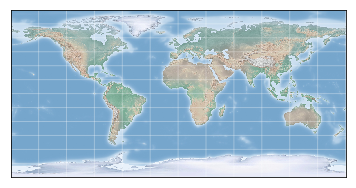

In [47]:
m = Basemap(projection='cyl', resolution=None, llcrnrlat=-90, urcrnrlat=90, 
            llcrnrlon=-180, urcrnrlon=180)
draw_map(m)

## Shapefiles
* Shapefiles store a special type of data known as geometry
    - Point (single long lat pair)
    - line (2 or more long lat pair)
    - Polygon (3 or more long and lat pair)
* my_map.shp (contains the geometry)
* my_map.dbf (holds attributes for each geometry)
* my_map.shx (links the attributes to the geometry)

## geopandas
* provides library to working with geospatial data.
* To read shape file in GeoDataFrame,

In [58]:
import geopandas as gpd

```
geo_df = gpd.read_file('filename.shp')
geo_df.head()
geo_df.loc[0, 'col_name']
print(geo_df.loc[0, 'col_name'])
geo_df.plot()
geo_df.plot(column='col_name', legend=True) # color map according to col_name.
plt.scatter(lng, lat, marker='p', c = 'darkgreen')
```

### GeoJSON
* Only single file we have to work.
* Human readable
* Supports multi-part geometry

In [64]:
neighborhoods = gpd.read_file('neighborhoods.geojson.txt')
school_dist = gpd.read_file('school_districts.geojson.txt')

In [65]:
neighborhoods.head()

,name,geometry
0,Historic Buena Vista,(POLYGON ((-86.79511056795417 36.1757596496334...
1,Charlotte Park,(POLYGON ((-86.87459668651866 36.1575770268129...
2,Hillwood,(POLYGON ((-86.87613708067906 36.1355409894979...
3,West Meade,"(POLYGON ((-86.9038380396094 36.1255414807897,..."
4,White Bridge,(POLYGON ((-86.86321427797685 36.1288622289404...


In [66]:
school_dist.head()

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,(POLYGON ((-86.77136400034288 36.3835669997190...
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,(POLYGON ((-86.75364713283636 36.4042760799855...
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,(POLYGON ((-86.76696199971282 36.0833250002130...
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,(POLYGON ((-86.5809831462547 36.20934685360503...
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,(POLYGON ((-86.97287099971373 36.2082789997189...


* When you want to differentiate regions, but not imply any type of relationship between the regions, a qualitative colormap is the best choice.

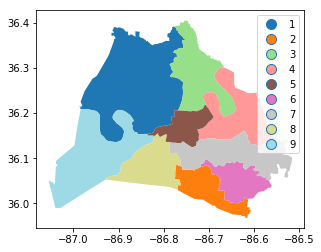

In [75]:
school_dist.plot(column='district', cmap='tab20', legend=True)

Text(0.5, 1.0, 'Nashville school districts')

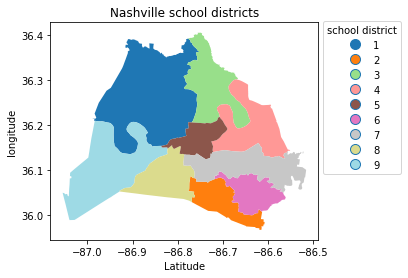

In [79]:
lgnd_kwds = {'title':'school district', 'loc':'upper left', 'bbox_to_anchor':(1,1.03), 'ncol':1}
school_dist.plot(column='district', cmap='tab20', legend=True, legend_kwds=lgnd_kwds)
plt.xlabel('Latitude')
plt.ylabel('longitude')
plt.title('Nashville school districts')

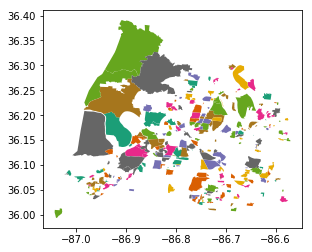

In [80]:
neighborhoods.plot(column='name', cmap='Dark2')

## Coordinate reference system
* Projection is needed to convert 3D earth to 2D.
* Setting CRS of geodataframe tells geopandas how to interpret long and lat (coordinates)
    - Distance unit is also depends on CRS being used.
        - EPSG:4326 units are decimal degree
        - EPSG:3857 units are meter

### Converting DataFrame to GeoDataFrame

#### Create geometry column

* To create point geometry from long and lat, we will use shapely package.

In [82]:
from shapely.geometry import Point

In [83]:
df = pd.read_csv('schools.csv')

In [84]:
df.head()

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)"
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)"
2,105,Amqui Elementary,319 Anderson Lane,Madison,TN,37115,(615)612-3678,10,Elementary School,Grade P3,Grade 4,36.273766,-86.703832,http://schools.mnps.org/amqui-elementary-school,Hunters Lane,"(36.27376585, -86.70383153)"
3,460,Andrew Jackson Elementary,110 Shute Ln,Old Hickory,TN,37138,(615)847-7317,15,Elementary School,Grade P4,Grade 4,36.231585,-86.623775,http://schools.mnps.org/andrew-jackson-element...,McGavock,"(36.23158465, -86.62377469)"
4,110,Antioch High School,1900 Hobson Pike,Antioch,TN,37013,(615)641-5400,20,High School,Grade 9,Grade 12,36.046675,-86.599418,http://schools.mnps.org/antioch-high-school,Antioch,"(36.04667464, -86.59941833)"


In [85]:
df['geometry'] = df.apply(lambda x:Point((x.Longitude, x.Latitude)), axis=1)

In [86]:
df.head()

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location,geometry
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)",POINT (-86.65884778 36.02181712)
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)",POINT (-86.8322292 36.2529607)
2,105,Amqui Elementary,319 Anderson Lane,Madison,TN,37115,(615)612-3678,10,Elementary School,Grade P3,Grade 4,36.273766,-86.703832,http://schools.mnps.org/amqui-elementary-school,Hunters Lane,"(36.27376585, -86.70383153)",POINT (-86.70383153 36.27376585)
3,460,Andrew Jackson Elementary,110 Shute Ln,Old Hickory,TN,37138,(615)847-7317,15,Elementary School,Grade P4,Grade 4,36.231585,-86.623775,http://schools.mnps.org/andrew-jackson-element...,McGavock,"(36.23158465, -86.62377469)",POINT (-86.62377469 36.23158465)
4,110,Antioch High School,1900 Hobson Pike,Antioch,TN,37013,(615)641-5400,20,High School,Grade 9,Grade 12,36.046675,-86.599418,http://schools.mnps.org/antioch-high-school,Antioch,"(36.04667464, -86.59941833)",POINT (-86.59941833000001 36.04667464)


* We created geometry columns which has Point gepmetry
* Lets make geoDataFrame

In [89]:
schools_crs = {'init':  'epsg:4326'} # coordinate reference system
schools_geo = gpd.GeoDataFrame(df, crs=schools_crs, geometry=df.geometry)

In [90]:
schools_geo.head()

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location,geometry
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)",POINT (-86.65884778 36.02181712)
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)",POINT (-86.8322292 36.2529607)
2,105,Amqui Elementary,319 Anderson Lane,Madison,TN,37115,(615)612-3678,10,Elementary School,Grade P3,Grade 4,36.273766,-86.703832,http://schools.mnps.org/amqui-elementary-school,Hunters Lane,"(36.27376585, -86.70383153)",POINT (-86.70383153 36.27376585)
3,460,Andrew Jackson Elementary,110 Shute Ln,Old Hickory,TN,37138,(615)847-7317,15,Elementary School,Grade P4,Grade 4,36.231585,-86.623775,http://schools.mnps.org/andrew-jackson-element...,McGavock,"(36.23158465, -86.62377469)",POINT (-86.62377469 36.23158465)
4,110,Antioch High School,1900 Hobson Pike,Antioch,TN,37013,(615)641-5400,20,High School,Grade 9,Grade 12,36.046675,-86.599418,http://schools.mnps.org/antioch-high-school,Antioch,"(36.04667464, -86.59941833)",POINT (-86.59941833000001 36.04667464)


In [91]:
type(df)

pandas.core.frame.DataFrame

In [92]:
type(schools_geo)

geopandas.geodataframe.GeoDataFrame

### Changing from one CRS to other

In [93]:
# convert geometry from decimal degrees to meters

schools_geo.geometry = schools_geo.geometry.to_crs(epsg=3857)

In [94]:
schools_geo.head()

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location,geometry
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)",POINT (-9646818.807601407 4303623.789516844)
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)",POINT (-9666119.538988819 4335484.432376049)
2,105,Amqui Elementary,319 Anderson Lane,Madison,TN,37115,(615)612-3678,10,Elementary School,Grade P3,Grade 4,36.273766,-86.703832,http://schools.mnps.org/amqui-elementary-school,Hunters Lane,"(36.27376585, -86.70383153)",POINT (-9651826.375745378 4338356.811854491)
3,460,Andrew Jackson Elementary,110 Shute Ln,Old Hickory,TN,37138,(615)847-7317,15,Elementary School,Grade P4,Grade 4,36.231585,-86.623775,http://schools.mnps.org/andrew-jackson-element...,McGavock,"(36.23158465, -86.62377469)",POINT (-9642914.489082061 4332534.030390264)
4,110,Antioch High School,1900 Hobson Pike,Antioch,TN,37013,(615)641-5400,20,High School,Grade 9,Grade 12,36.046675,-86.599418,http://schools.mnps.org/antioch-high-school,Antioch,"(36.04667464, -86.59941833)",POINT (-9640203.151489282 4307045.632559941)


In [95]:
schools_geo.crs

{'init': 'epsg:3857', 'no_defs': True}

### Spatial Join
* Always make sure 2 geodataframe share the same crs before spatially join them
* `.sjoin()` has op argument which defines operation, specify type of special join
    - intersects
    - contains
    - within

* I have two geometry one is polygon other is points,
![](images/region_and_points.png)
* `gpd.sjoin(blue_region_gdf, black_point_gdf, op = 'intersects')`
![](images/intersects.png)
* `gpd.sjoin(blue_region_gdf, black_point_gdf, op = 'contains')`
![](images/contains.png)
* `gpd.sjoin(black_point_gdf, blue_region_gdf, op = 'within')`
![](images/within.png)

#### How many council districts are within school districts

In [98]:
school_dist = gpd.read_file('school_districts.geojson.txt')
council_dit = gpd.read_file('council_districts.geojson')

In [99]:
school_dist.head(2)

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,(POLYGON ((-86.77136400034288 36.3835669997190...
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,(POLYGON ((-86.75364713283636 36.4042760799855...


In [100]:
council_dit.head(2)

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,(POLYGON ((-86.90738248774342 36.3905151283193...
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,(POLYGON ((-86.75902399986667 36.2309080000732...


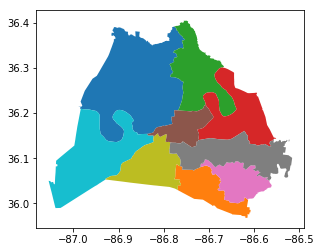

In [101]:
school_dist.plot(column='district')

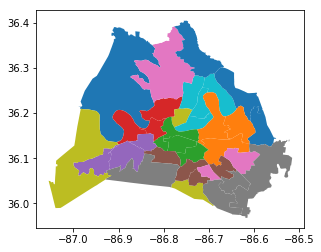

In [103]:
council_dit.plot(column='district')

In [104]:
within_dgf = gpd.sjoin(council_dit, school_dist, op='within')

In [105]:
within_dgf.head()

,first_name_left,email_left,res_phone,bus_phone,last_name_left,position_left,district_left,geometry,index_right,first_name_right,city,zip,email_right,state,last_name_right,address,position_right,term_expir,district_right,phone
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,(POLYGON ((-86.90738248774342 36.3905151283193...,0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,(POLYGON ((-86.75902399986667 36.2309080000732...,0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269
2,Nancy,nancy.vanreece@nashville.gov,615-576-0488,615-862-6780,VanReece,Council Member,8,(POLYGON ((-86.72850199989709 36.2832840002146...,1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234
3,Bill,bill.pridemore@nashville.gov,615-915-1419,615-862-6780,Pridemore,Council Member,9,(POLYGON ((-86.68680500011935 36.2867050001350...,1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234
9,Doug,doug.pardue@nashville.gov,615-859-9370,615-305-3945,Pardue,Council Member,10,(POLYGON ((-86.75364713283636 36.4042760799855...,1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234


In [106]:
within_dgf.shape

(11, 20)

* We can get the same result using

In [107]:
contains_gdf = gpd.sjoin(school_dist, council_dit, op='contains')

In [108]:
contains_gdf.shape

(11, 20)

In [111]:
within_dgf.rename(columns={'district_left':'council_district', 'district_right':'school_district'}, inplace=True)

In [112]:
within_dgf.head()

,first_name_left,email_left,res_phone,bus_phone,last_name_left,position_left,council_district,geometry,index_right,first_name_right,city,zip,email_right,state,last_name_right,address,position_right,term_expir,school_district,phone
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,(POLYGON ((-86.90738248774342 36.3905151283193...,0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,(POLYGON ((-86.75902399986667 36.2309080000732...,0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269
2,Nancy,nancy.vanreece@nashville.gov,615-576-0488,615-862-6780,VanReece,Council Member,8,(POLYGON ((-86.72850199989709 36.2832840002146...,1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234
3,Bill,bill.pridemore@nashville.gov,615-915-1419,615-862-6780,Pridemore,Council Member,9,(POLYGON ((-86.68680500011935 36.2867050001350...,1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234
9,Doug,doug.pardue@nashville.gov,615-859-9370,615-305-3945,Pardue,Council Member,10,(POLYGON ((-86.75364713283636 36.4042760799855...,1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234


In [117]:
within_dgf[['council_district', 'school_district']].groupby('school_district').agg('count').sort_values('council_district', ascending=False)

,council_district
school_district,
3,3
1,2
9,2
2,1
5,1
6,1
8,1


### GeoSeries
* geometry column of geo datagrame
* GeoSeries.area - returns the area of each geometry in a GeoSeries
* GeoSeries.centroid - returns the center point of each geometry in a GeoSeries
* GeoSeries.distance(other) - returns the minimum distance to other

In [121]:
council_dit.loc[0,'geometry'].area

0.022786149636921844

In [122]:
council_dit.loc[0,'geometry'].area

0.022786149636921844

In [123]:
district_area = school_dist.geometry.area

In [125]:
district_area.sort_values(ascending=False) # area unit is decimal degree square

0    0.036641
4    0.023030
8    0.015004
1    0.014205
3    0.014123
5    0.010704
2    0.008328
7    0.007813
6    0.006415
dtype: float64

In [126]:
school_dist_3857 = school_dist.to_crs(epsg=3857)

In [127]:
school_dist_3857.geometry.area # area is m^2

0    5.631344e+08
1    2.183699e+08
2    1.276154e+08
3    2.168715e+08
4    3.532321e+08
5    1.641375e+08
6    9.846963e+07
7    1.197423e+08
8    2.301357e+08
dtype: float64

In [128]:
school_dist_3857.geometry.area / 10**6 # km^2

0    563.134380
1    218.369949
2    127.615396
3    216.871511
4    353.232132
5    164.137548
6     98.469632
7    119.742279
8    230.135653
dtype: float64

* Centroid returns point at the center of geometry

In [129]:
school_dist['center'] = school_dist.geometry.centroid

In [130]:
school_dist.center

0     POINT (-86.86086595994405 36.2628221811899)
1    POINT (-86.72361421487962 36.28515517790142)
2    POINT (-86.70156420691957 36.03021153030475)
3    POINT (-86.63964402189863 36.19696692376599)
4    POINT (-86.95428425398846 36.10392411644131)
5    POINT (-86.82738771169281 36.08341995053765)
6    POINT (-86.75214735715096 36.16995457037151)
7    POINT (-86.63366342590973 36.04945650103935)
8    POINT (-86.64295870758193 36.10809747821918)
Name: center, dtype: object

### Distance between 2 points.

In [131]:
district_one = school_dist.loc[school_dist.district=='1']

In [132]:
district_one.head()

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry,center
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,(POLYGON ((-86.77136400034288 36.3835669997190...,POINT (-86.86086595994405 36.2628221811899)


In [133]:
schools_geo.head()

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location,geometry
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)",POINT (-9646818.807601407 4303623.789516844)
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)",POINT (-9666119.538988819 4335484.432376049)
2,105,Amqui Elementary,319 Anderson Lane,Madison,TN,37115,(615)612-3678,10,Elementary School,Grade P3,Grade 4,36.273766,-86.703832,http://schools.mnps.org/amqui-elementary-school,Hunters Lane,"(36.27376585, -86.70383153)",POINT (-9651826.375745378 4338356.811854491)
3,460,Andrew Jackson Elementary,110 Shute Ln,Old Hickory,TN,37138,(615)847-7317,15,Elementary School,Grade P4,Grade 4,36.231585,-86.623775,http://schools.mnps.org/andrew-jackson-element...,McGavock,"(36.23158465, -86.62377469)",POINT (-9642914.489082061 4332534.030390264)
4,110,Antioch High School,1900 Hobson Pike,Antioch,TN,37013,(615)641-5400,20,High School,Grade 9,Grade 12,36.046675,-86.599418,http://schools.mnps.org/antioch-high-school,Antioch,"(36.04667464, -86.59941833)",POINT (-9640203.151489282 4307045.632559941)


In [134]:
district_one.crs

{'init': 'epsg:4326'}

In [135]:
schools_geo.crs

{'init': 'epsg:3857', 'no_defs': True}

In [138]:
schools_geo.geometry = schools_geo.geometry.to_crs(epsg=4326)

In [139]:
schools_geo.crs

{'init': 'epsg:4326', 'no_defs': True}

In [140]:
schools_in_dist1 = gpd.sjoin(schools_geo, district_one,op='within')

C:\Users\davep\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [141]:
schools_in_dist1.shape

(30, 30)

In [181]:
schools_in_dist1.columns

Index(['School ID', 'School Name', 'Street Address', 'City', 'State',
       'ZIP Code', 'Phone Number', 'School State ID', 'School Level',
       'Lowest Grade', 'Highest Grade', 'Latitude', 'Longitude',
       'School Website', 'Cluster', 'Mapped Location', 'geometry',
       'index_right', 'first_name', 'city', 'zip', 'email', 'state',
       'last_name', 'address', 'position', 'term_expir', 'district', 'phone',
       'center'],
      dtype='object')

In [143]:
schools_in_dist1.head()

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,...,zip,email,state,last_name,address,position,term_expir,district,phone,center
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,...,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,POINT (-86.86086595994405 36.2628221811899)
8,135,Bellshire Elementary,1128 Bell Grimes Lane,Nashville,TN,37207,(615)860-1452,45,Elementary School,Grade P3,...,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,POINT (-86.86086595994405 36.2628221811899)
9,118,Brick Church College Prep,2835 Brick Church Pike,Nashville,TN,37207,(615)806-6317,118,Charter,Grade 5,...,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,POINT (-86.86086595994405 36.2628221811899)
10,165,Buena Vista Elementary,1531 9th Avenue North,Nashville,TN,37208,(615)291-6762,70,Elementary School,Grade P4,...,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,POINT (-86.86086595994405 36.2628221811899)
20,215,Cockrill Elementary,4701 Indiana Ave,Nashville,TN,37209,(615)298-8075,120,Elementary School,Grade P3,...,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,POINT (-86.86086595994405 36.2628221811899)


In [145]:
distance={}

for row in schools_in_dist1.iterrows():
    vals = row[1]
    key = vals['School Name']
    ctr = vals['center']
    distance[key] = vals['geometry'].distance(ctr)

In [146]:
distance

{'Alex Green Elementary': 0.030287172719703152,
 'Bellshire Elementary': 0.09880451409096462,
 'Brick Church College Prep': 0.08961013862716266,
 'Buena Vista Elementary': 0.10570511270825833,
 'Cockrill Elementary': 0.10776856121961256,
 'Creswell Middle Prep School of the Arts': 0.07071695528308192,
 'Cumberland Elementary': 0.05107245423888074,
 'Haynes Middle': 0.09051735342453113,
 'Hull-Jackson Elementary': 0.09021711911422615,
 'Ivanetta H. Davis Learning Center at Bordeaux': 0.07662457433121096,
 'Joelton Elementary': 0.0533419681128366,
 'Joelton Middle': 0.05125961450823257,
 'John Early Middle': 0.09422796012374718,
 'Jones Elementary': 0.10102567625425847,
 'KIPP Nashville College Prep': 0.06251427354823696,
 'KIPP Nashville College Prep Elementary': 0.062254750966666106,
 'Moses McKissack Middle': 0.10691030507945888,
 'Nashville Academy of Computer Science': 0.08320287768738649,
 'Nashville Prep': 0.10066854450223685,
 'Purpose Prep': 0.09526210189385256,
 'RePublic High 

### Folium
* Library to create map. built upon leaflet.js
* We can create map of any location as long as we know lat and lng.
* We can create markers on top of map
* Default style is open street map, zoom out will show country border, zoom in will show street level view. Using `tiles` parameter we can change map  style
    - Stamen Toner: useful to explore costal zone and river
    - Stamen Terrain: Visualizing natural and hill in color

In [158]:
import folium

In [159]:
# Map centered at ahmedabad

In [162]:
ahm = folium.Map(location=[23.0063,72.6026], zoom_start=12) # lat long pair, higher the zoom_Start, closer the map

In [187]:
display(ahm)

In [188]:
ahm = folium.Map(location=[23.0063,72.6026], zoom_start=12, tiles='Stamen Terrain')

In [189]:
display(ahm)

In [165]:
district_one = district_one[['district', 'center', 'geometry']]

In [166]:
district_one.head()

,district,center,geometry
0,1,POINT (-86.86086595994405 36.2628221811899),(POLYGON ((-86.77136400034288 36.3835669997190...


In [167]:
center_point = district_one.center[0]

In [169]:
district_center = [center_point.y, center_point.x]

In [170]:
print(center_point)

POINT (-86.86086595994405 36.2628221811899)


In [171]:
print(district_center)

[36.262822181189904, -86.86086595994405]


In [172]:
# Create a folium map centered on district 1
district_map = folium.Map(location=district_center)

In [173]:
display(district_map)

In [174]:
# Let's add outline
folium.GeoJson(district_one.geometry).add_to(district_map)

In [175]:
display(district_map)

### Markers and popups

In [176]:
schools_in_dist1.head()

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,...,zip,email,state,last_name,address,position,term_expir,district,phone,center
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,...,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,POINT (-86.86086595994405 36.2628221811899)
8,135,Bellshire Elementary,1128 Bell Grimes Lane,Nashville,TN,37207,(615)860-1452,45,Elementary School,Grade P3,...,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,POINT (-86.86086595994405 36.2628221811899)
9,118,Brick Church College Prep,2835 Brick Church Pike,Nashville,TN,37207,(615)806-6317,118,Charter,Grade 5,...,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,POINT (-86.86086595994405 36.2628221811899)
10,165,Buena Vista Elementary,1531 9th Avenue North,Nashville,TN,37208,(615)291-6762,70,Elementary School,Grade P4,...,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,POINT (-86.86086595994405 36.2628221811899)
20,215,Cockrill Elementary,4701 Indiana Ave,Nashville,TN,37209,(615)298-8075,120,Elementary School,Grade P3,...,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,POINT (-86.86086595994405 36.2628221811899)


In [177]:
district1_map = folium.Map(location=district_center, zoom_start=11)

In [179]:
display(district1_map)

In [185]:
for row in schools_in_dist1.iterrows():
    row_values = row[1]
    location = [row_values['Latitude'], row_values['Longitude']]
    popup = '<strong>' + row_values['School Name'] + '</strong>'
    marker = folium.Marker(location=location, popup=popup)
    marker.add_to(district1_map)

In [186]:
display(district1_map)

### Choropleth
* Use color variation to compare the region.  Using color intensity we visualize statistical measure such as per capita income for various region. Higher the measurement darker the color.